The principle purpose of this project is to investigate whether there are any patterns to the types of species that become endangered. 
1. What is the distribution of conservation_status for animals?
2. Are certain types of species more likely to be endangered?
3. Are the differences between species and their conservation status significant?
4. Which species were spotted the most at each park?

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 

In [175]:
observations = pd.read_csv('observations.csv')
species_info = pd.read_csv('species_info.csv')
species_observations = observations.merge(species_info, on = 'scientific_name')
print(species_observations.head())

      scientific_name                            park_name  observations  \
0  Vicia benghalensis  Great Smoky Mountains National Park            68   
1  Vicia benghalensis               Yosemite National Park           148   
2  Vicia benghalensis            Yellowstone National Park           247   
3  Vicia benghalensis                  Bryce National Park           104   
4      Neovison vison  Great Smoky Mountains National Park            77   

         category                        common_names conservation_status  
0  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
1  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
2  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
3  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
4          Mammal                       American Mink                 NaN  


Index(['scientific_name', 'park_name', 'observations', 'category',
       'common_names', 'conservation_status'],
      dtype='object')
  conservation_status  observations
2  Species of Concern         93962
0          Endangered          3513
3          Threatened          3339
1         In Recovery          2107


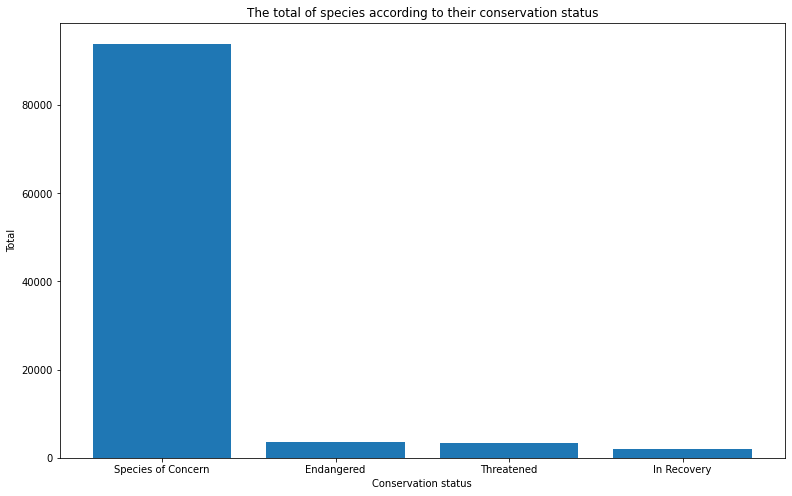

Text(0.5, 1.0, 'The sum of various species categories')

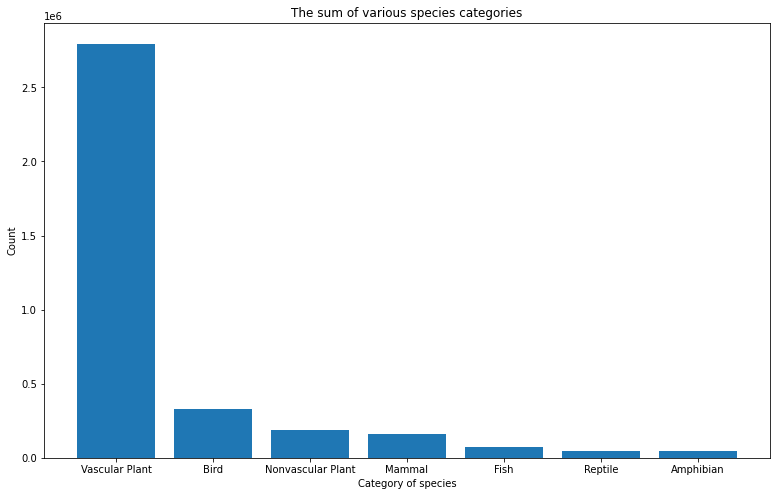

In [199]:
print(species_observations.columns)
category_sum = species_observations.groupby('category').agg({'observations': 'sum'}).reset_index()
status_sum = species_observations.groupby('conservation_status').sum().reset_index()
status_sum = status_sum.sort_values('observations', ascending=False)
print(status_sum)
fig, ax = plt.subplots(figsize=(13, 8))
ax.bar(status_sum['conservation_status'], status_sum['observations'])
ax.set_xlabel('Conservation status')
ax.set_ylabel('Total')
ax.set_title('The total of species according to their conservation status')
plt.show()
category_sum = category_sum.sort_values('observations',ascending=False)
fig, ax = plt.subplots(figsize=(13, 8))
ax.bar(category_sum['category'], category_sum['observations'])
ax.set_xlabel('Category of species')
ax.set_ylabel('Count')
ax.set_title('The sum of various species categories')


The two charts give us an idea of the proportions of our data according to type of species as well as conservation status. Clearly, most of our data consists of vascular plants as well as species of concern. They make up the overwhelming majority of our rows. 

['Species of Concern' 'Threatened' 'Endangered' 'In Recovery']


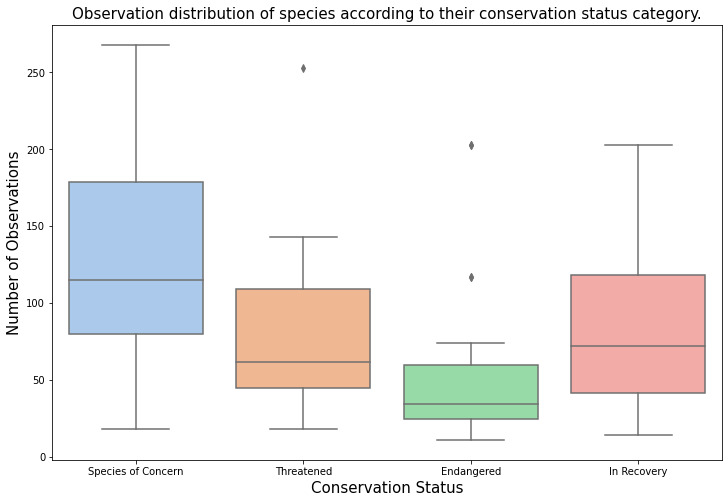

<Figure size 432x288 with 0 Axes>

In [200]:

  
# Let's get rid of the NaN values for conservation_status
conservation_status_df = species_observations.dropna()

print(conservation_status_df['conservation_status'].unique()) 
ax, fig = plt.subplots(figsize=(12, 8))
sns.boxplot(x = 'conservation_status', y = 'observations', data = conservation_status_df, palette = 'pastel')
plt.ylabel('Number of Observations', size=15)
plt.xlabel('Conservation Status', size=15)
plt.title('Observation distribution of species according to their conservation status category.', size=15)
plt.show()
plt.clf()

We can use a boxplot to have a look at the distribution of the data to give us some meaningful insights into both the observations and conservation_status variables. As expected, the Endangered species have a much lower median number of obeservations and those of concern have the highest median number of observations. This makes sense as the conservation is an ordianl catgeorical variable, with endangered being the most concerning and species of concern being the least concerning. The interquartile range of the Species of Concern is the greatest, the box represents the 25th and 75th quartile of Species of Concern. Interestingly, endangered species have two outliers. An endangered number of species with a high number of observations. We will discover which species they later on.

<AxesSubplot:xlabel='conservation_status', ylabel='observations'>

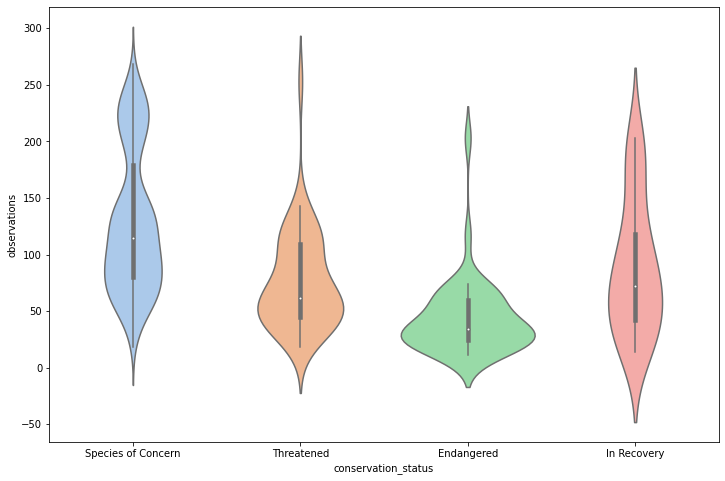

In [152]:
## plot violinplot
fig, ax = plt.subplots(figsize=(12, 8))
sns.violinplot(x = 'conservation_status', y = 'observations', data = conservation_status_df, palette = 'pastel')


The violinplot gives us a little bit more information that the previous boxplot does. It shows us that Species of Concern is bimodal, meaning it has two peaks to its distribution. The endangered species has most of its species in the 0 to 50 observations range. Curiously, those species in recovery tend to be distrubuted fairly evenly. Firstly,  let's visiualize the species of concern distribution on a histogram.

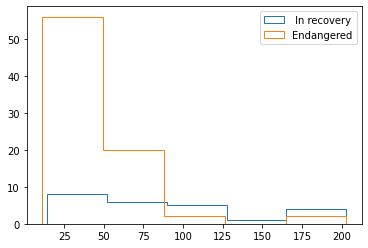

In [201]:
in_recovery = species_observations[species_observations['conservation_status'] == 'In Recovery']
endangered = species_observations[species_observations['conservation_status'] == 'Endangered']



plt.hist(in_recovery.observations, bins=5, histtype='step', label=' In recovery')
plt.hist(endangered.observations, bins=5, histtype='step', label='Endangered')
plt.legend()

This graphs tells us that the volume of endangered species is much higher thatn those in recovery. Although, those in recovery tend to be more concentrated in the lower end of observations. Let's look at the types of species that are endangered to look for any trends. 

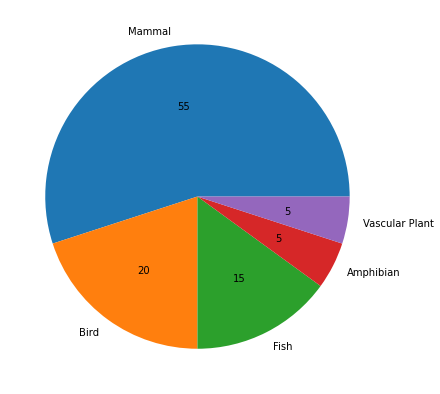

In [243]:
plt.figure(figsize=(7, 7))
labels = ['Mammal', 'Bird', 'Fish', 'Amphibian', 'Vascular Plant']
plt.pie(endangered.category.value_counts(normalize=True).values, labels=labels, autopct='%d');

Clearly, the majority of endangered species are mammals, with the second largest being bird followed by fish and the smallest group being vascular plants and amphibians. We ought to compare the difference between species and conservation status to see if there is a significant association between the two variables.